# Nuevo Proyecto Machine Learning 

- Este proyecto será un recomendador donde la persona deberá de poner ciertos features para recomendar un restaurante dentro de los que están en la guía Michelin. 





## Extracción de datos

In [238]:
#Para la manipulación de datos
import pandas as pd
import time
import numpy as np

#Servicio y driver de Chrome de Selenium
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

#Las opciones que vamos a tener para buscar elementos
from selenium.webdriver.common.by import By

#Para cuando queramos mandar pulsaciones de teclado
from selenium.webdriver.common.keys import Keys

# Para generar datos artificiales 
import random 

# Para crear el recomendador 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
import sklearn
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

# Para el análsis de la muestra 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
# Creamos la conexión con la página web
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service)
time.sleep(2)

[WDM] - Downloading: 100%|██████████| 6.80M/6.80M [01:05<00:00, 108kB/s] 


In [3]:
# Ponemos la página web 
url = 'https://guide.michelin.com/es/es'
driver.get(url)


In [4]:
# Encontrar las cookies
elements_by_ID = driver.find_element(By.ID, 'didomi-notice-agree-button')
print(elements_by_ID.text)


Aceptar y cerrar


In [5]:
# Aceptamos las cookies 
acepto = driver.find_element(By.ID, 'didomi-notice-agree-button')
acepto.click()

In [6]:
# Seleccionamos la barra y escribimos Madrid 
# Por ralguna razon el codigo solo me va cuando esta abierta la ventana del chrome a mitad 
# Hay algo en el codigo de la página que hace que el ID pase de ser 'autocomplete-0-input' a 'autocomplete-1-input'

text = driver.find_element(By.ID, 'autocomplete-0-input')

text.click()
time.sleep(2)
text.send_keys('Madrid')
time.sleep(2)
text.send_keys(Keys.ENTER)

In [7]:
# Sacamos el nombre del restaurante 

titulo = driver.find_element(By.CSS_SELECTOR, 'h3')
print(titulo.text)

In [8]:
# Sacamos la ubicacion del restaurante 

ubi = driver.find_element(By.XPATH, '/html/body/main/section[1]/div/div/div[2]/div[14]/div/div[2]/div[2]')
print(ubi.text)

Madrid, España


In [9]:
# Sacamos los euroes y el estilo del restaurante 

ubi = driver.find_element(By.XPATH, '/html/body/main/section[1]/div/div/div[2]/div[1]/div/div[2]/div[3]')
print(ubi.text)

€€€€ · Creativa


In [10]:
# Cogemos todos los links que hay en la página
# Hacemos una lista que tenga todos los URLS disponibles de la página para quedarnos con ellos 

urls = []
for i in range(1,9,1):
    link = f'https://guide.michelin.com/es/es/comunidad-de-madrid/madrid/restaurantes/page/{i}'
    urls.append(link)

In [11]:
# Hacemos el bucle para sacar los 154 datos


lista_nombres = []
lista_ubis = []
lista_estilos = []

for url in urls[:]:
    # Ponemos el servidor donde queremos navegar 

    service = Service(ChromeDriverManager().install())
    driver = webdriver.Chrome(service=service)
    time.sleep(2)
    driver.get(url)
    time.sleep(2)

    # Le damos click al boton de cookies 
    acepto = driver.find_element(By.ID, 'didomi-notice-agree-button')
    acepto.click()

    # Empezamos a crear los dataframes
    nombre = driver.find_elements(By.CSS_SELECTOR, 'h3')
    nombres = []
    for titol in nombre:
        nombres.append(titol.text)

    if url != 'https://guide.michelin.com/es/es/comunidad-de-madrid/madrid/restaurantes/page/8':
        for i in range(1,21,1):
            ubi = driver.find_element(By.XPATH, value = f'/html/body/main/section[1]/div/div/div[2]/div{[i]}/div/div[2]/div[2]')
            ubicacion = []
            a = ubi.text
            ubicacion.append(a)
            lista_ubis.append(ubicacion)
    else: 
        for i in range(1,15,1):
            ubi = driver.find_element(By.XPATH, value = f'/html/body/main/section[1]/div/div/div[2]/div{[i]}/div/div[2]/div[2]')
            ubicacion = []
            a = ubi.text
            ubicacion.append(a)
            lista_ubis.append(ubicacion)


    if url != 'https://guide.michelin.com/es/es/comunidad-de-madrid/madrid/restaurantes/page/8':
        for i in range(1,21,1):
            estilo = driver.find_element(By.XPATH, value = f'/html/body/main/section[1]/div/div/div[2]/div{[i]}/div/div[2]/div[3]')
            style = []
            b = estilo.text
            style.append(b)
            lista_estilos.append(style)
    else: 
        for i in range(1,15,1):
            estilo = driver.find_element(By.XPATH, value = f'/html/body/main/section[1]/div/div/div[2]/div{[i]}/div/div[2]/div[3]')
            style = []
            b = estilo.text
            style.append(b)
            lista_estilos.append(style)

    lista_nombres.append(nombres)
    print(url)
    time.sleep(1)


https://guide.michelin.com/es/es/comunidad-de-madrid/madrid/restaurantes/page/1
https://guide.michelin.com/es/es/comunidad-de-madrid/madrid/restaurantes/page/2
https://guide.michelin.com/es/es/comunidad-de-madrid/madrid/restaurantes/page/3
https://guide.michelin.com/es/es/comunidad-de-madrid/madrid/restaurantes/page/4
https://guide.michelin.com/es/es/comunidad-de-madrid/madrid/restaurantes/page/5
https://guide.michelin.com/es/es/comunidad-de-madrid/madrid/restaurantes/page/6
https://guide.michelin.com/es/es/comunidad-de-madrid/madrid/restaurantes/page/7
https://guide.michelin.com/es/es/comunidad-de-madrid/madrid/restaurantes/page/8


In [12]:
# Creamos un dataframe a mano de los restaurantes que tienen estrella 

estrellas = [2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,
                           0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2,0,0,0,0,1,0,0,0,0,0,0,
                           0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,
                           1,0,0,1,0,0,0,0,0,1,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

In [13]:
# Hacemos que las listas sean de una sola dimension

lista_names = []
lista_location = []
lista_style = []

for i in lista_nombres:
    for j in i:
        lista_names.append(j)

for i in lista_ubis:
    for j in i:
        lista_location.append(j)

for i in lista_estilos:
    for j in i:
        lista_style.append(j)


lista_names = [r for r in lista_names if r !='']

In [168]:
# Creamos el dataframe 

data = {'Nombres': lista_names,
        'Restaurante': lista_location,
        'Estilo/Precio': lista_style, 
        'Estrellas Michelin': estrellas}

Restaurantes = pd.DataFrame(data)
Restaurantes.head()

,Nombres,Restaurante,Estilo/Precio,Estrellas Michelin
0,Paco Roncero,"Madrid, España",€€€€ · Creativa,2
1,CEBO,"Madrid, España",€€€ · Creativa,0
2,Umiko,"Madrid, España",€€€ · Japonesa,0
3,Casa Mortero,"Madrid, España",€€ · Creativa,0
4,The Omar,"Madrid, España",€€ · Tradicional,0


In [169]:
# Hacemos un split de la columna Estilo/Precio para quedarnos con dos variables del estilo y del precio 
Restaurantes[['Precio', 'Estilo']] = Restaurantes['Estilo/Precio'].str.split('·', n=1, expand=True)
Restaurantes = Restaurantes.drop(columns= 'Estilo/Precio')

In [170]:
Restaurantes

,Nombres,Restaurante,Estrellas Michelin,Precio,Estilo
0,Paco Roncero,"Madrid, España",2,€€€€,Creativa
1,CEBO,"Madrid, España",0,€€€,Creativa
2,Umiko,"Madrid, España",0,€€€,Japonesa
3,Casa Mortero,"Madrid, España",0,€€,Creativa
4,The Omar,"Madrid, España",0,€€,Tradicional
...,...,...,...,...,...
149,99 sushi bar,"Alcobendas, España",0,€€€,Japonesa
150,Casa de Pías,"Getafe, España",0,€€,Moderna
151,La Rotonda,"Rivas-Vaciamadrid, España",0,€€,Tradicional
152,El Viejo Fogón,"Majadahonda, España",0,€€,Tradicional


## Creación del Recomendador 

- Primero crearemos unos datos artificiales para entrenar el modelo 
- Haremos un modelo de recomendación basado en la opinion previa de usuarios
- Después lo entrenaremos 
- Finalemnte tendremos el producto final 

### Matrix


In [225]:
# Creamos aleatorias para hacer los datos artificiales donde se entrenara el modelo 

nombres = ['Usuario1', 'Usuario2', 'Usuario3', 'Usuario4']
personas = []
resta = []
numeros = [1,2,3,4,5]
valoracion = []
ocasion =  ['Cumpleaños', 'Casual', 'Aniversario', 'Cita romántica']
oc = []
sitios= []

for i in range(700):
    personas.append(random.randint(2,6))

for item in lista_names:
    resta.append(item)
while len(resta) < 700:
    resta.append(random.choice(lista_names))

for i in range(700):
    valoracion.append(random.choice(numeros))

for i in range(700):
    oc.append(random.choice(ocasion))

for i  in range(700):
     sitios.append(random.choice(nombres))

In [226]:
# Unismo todos los datos para crear el DataFrame

fake_data = {'Usuario': sitios,
        'Personas': personas,
        'Restaurante': resta,
        'Valoración': valoracion,
        'Ocasion': oc}
fake_data = pd.DataFrame(fake_data)
fake_data

,Usuario,Personas,Restaurante,Valoración,Ocasion
0,Usuario3,5,Paco Roncero,1,Casual
1,Usuario1,2,CEBO,1,Casual
2,Usuario3,6,Umiko,4,Cumpleaños
3,Usuario2,2,Casa Mortero,3,Aniversario
4,Usuario4,5,The Omar,1,Cita romántica
...,...,...,...,...,...
695,Usuario2,2,Bichopalo,3,Cita romántica
696,Usuario3,5,Shinatora Ya,5,Cita romántica
697,Usuario3,4,Rubaiyat Madrid,3,Cumpleaños
698,Usuario1,2,Shinatora Ya,1,Cita romántica


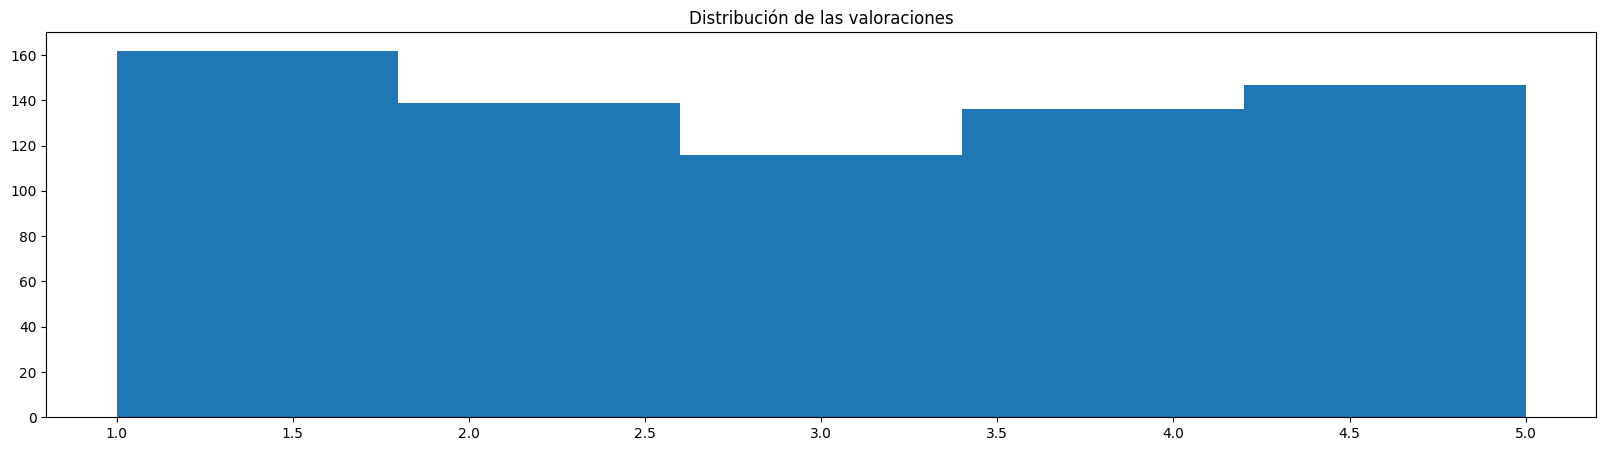

In [227]:
# Hacemos un histograma para ver los ratings generados 

plt.hist(fake_data.Valoración, bins=5)
plt.title('Distribución de las valoraciones')
plt.show()

In [228]:
# Creamos matriz donde cruzamos los Usuarios con los Restaurantes 

matriz = pd.pivot_table(fake_data, values='Valoración', index='Usuario', columns= 'Restaurante' ).fillna(0)
matriz

Restaurante,99 sushi bar,A'Barra,A'Kangas by Urrechu,A'Nómalo,Alabaster,Alcotán,Amparito Roca,Amós,Arallo Taberna,Arce,...,Urrechu,Vinoteca Moratín,Xeito! 19' 20'',Yugo,Zalacaín,Zuara Sushi,Zurito,enklima,Ático,Èter
Usuario,,,,,,,,,,,,,,,,,,,,,
Usuario1,5.0,3.00,3.666667,0.0,2.000000,3.0,4.0,1.00,1.0,1.0,...,0.0,5.0,5.0,0.000000,5.0,2.0,4.333333,3.0,2.0,4.0
Usuario2,2.0,0.00,4.000000,4.0,2.333333,0.0,0.0,1.00,2.0,0.0,...,4.0,0.0,1.0,4.000000,0.0,3.0,1.000000,2.5,2.0,1.0
Usuario3,3.0,2.00,0.000000,3.5,0.000000,4.0,1.0,4.00,2.0,2.5,...,0.0,3.0,5.0,0.000000,0.0,2.0,3.000000,5.0,0.0,5.0
Usuario4,2.5,3.25,2.250000,4.5,0.000000,4.0,4.0,2.75,5.0,5.0,...,4.5,2.0,3.0,2.666667,0.0,5.0,0.000000,1.0,4.0,0.0


In [229]:
# Con esta fórmula vemos cuanto valores en 0 hay en el dataset 
ratings = matriz.values
sparsity = float(len(ratings.nonzero()[0]))
sparsity /= (ratings.shape[0] * ratings.shape[1])
sparsity *= 100
print('Sparsity: {:4.2f}%'.format(sparsity))

Sparsity: 68.63%


In [230]:
# Dividimos en train/test 

ratings_train, ratings_test = train_test_split(ratings, test_size=0.25, random_state=42)
print(ratings_train.shape)
print(ratings_test.shape)

(3, 153)
(1, 153)


In [231]:
# Hacemos una matriz de similitud por las distancias de coseno 

sim_matrix = 1- sklearn.metrics.pairwise.cosine_distances(ratings)
print(sim_matrix.shape)

(4, 4)


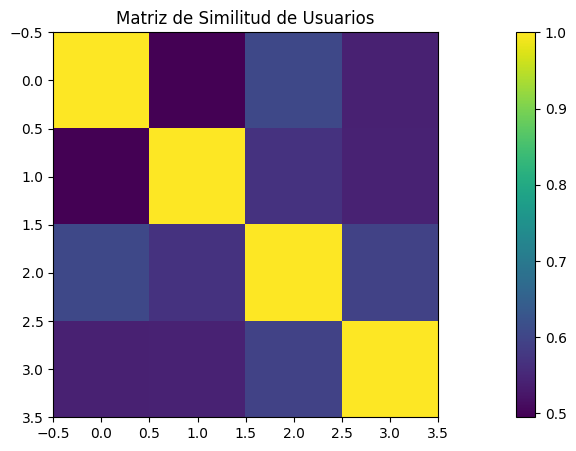

In [232]:
# Hacemos un plot de la matriz de similitud 

plt.imshow(sim_matrix)
plt.colorbar()
plt.title('Matriz de Similitud de Usuarios')
plt.show()

In [233]:
# Separamos 

sim_matrix_train = sim_matrix[0:3, 0:3]
sim_matrix_test = sim_matrix[3:,3: ]
users_predictions = sim_matrix_train.dot(ratings_train) / np.array([np.abs(sim_matrix_train).sum(axis=1)]).T


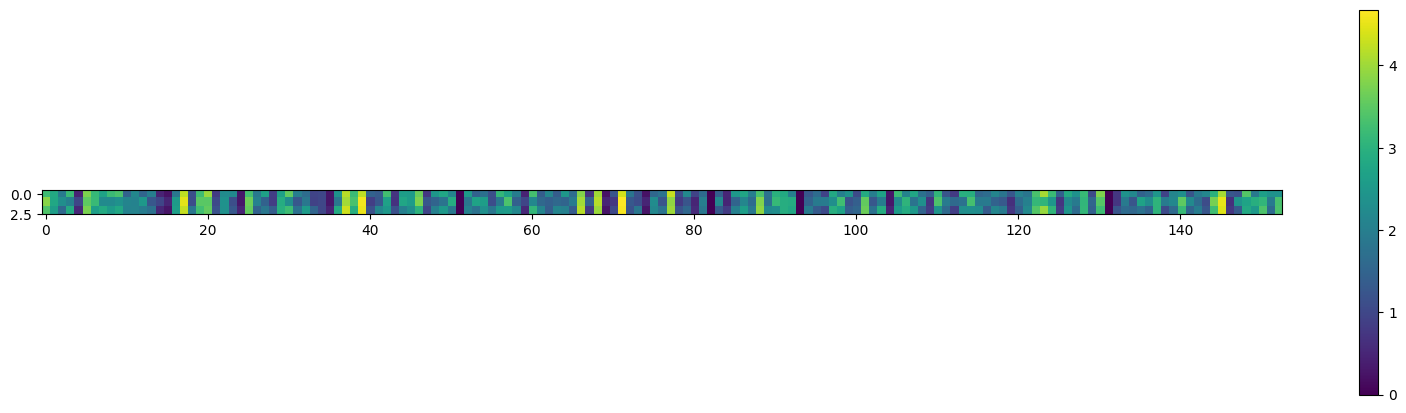

In [234]:
plt.rcParams['figure.figsize'] = (20.0, 5.0)
plt.imshow(users_predictions);
plt.colorbar()
plt.show()